In [325]:

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plot
from matplotlib.ticker import FuncFormatter
from io import StringIO as st
%matplotlib inline


In [326]:
train=pd.read_csv(r'F:\Data_Science\Analytic_Vidya\train_loan_pred.csv')
test=pd.read_csv(r'F:\Data_Science\Analytic_Vidya\test_loan_pred.csv')

In [327]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [328]:
test.describe()

C:\Users\RahulJaiswal\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,NaN,NaN,NaN
50%,3786.000000,1025.000000,NaN,NaN,NaN
75%,5060.000000,2430.500000,NaN,NaN,NaN
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [329]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [330]:
cat_col=test.columns[test.dtypes=='object']

In [331]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [332]:
train[cat_col].apply(lambda x:len(x.unique()))

Loan_ID          614
Gender             3
Married            3
Dependents         5
Education          2
Self_Employed      3
Property_Area      3
dtype: int64

In [333]:
train[cat_col].apply(lambda x: sum(x.isnull()))

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
dtype: int64

In [334]:
train.apply(lambda x: sum(x.isnull()))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [335]:
train.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [336]:
train.apply(lambda x: x.value_counts())

C:\Users\RahulJaiswal\Anaconda3\lib\site-packages\pandas\indexes\api.py:71: RuntimeWarning: unorderable types: str() < int(), sort order is undefined for incomparable objects
  result = result.union(other)
C:\Users\RahulJaiswal\Anaconda3\lib\site-packages\pandas\indexes\api.py:71: RuntimeWarning: unorderable types: str() < float(), sort order is undefined for incomparable objects
  result = result.union(other)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,NaN,NaN,NaN,345.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3+,NaN,NaN,NaN,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Female,NaN,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Graduate,NaN,NaN,NaN,NaN,480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LP001002,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LP001003,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LP001005,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LP001006,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [337]:
from scipy.stats import mode

In [338]:
mode(train['LoanAmount'].dropna()).mode[0]

120.0

In [339]:
for i in cat_col:
    train[i].fillna(mode(train[i].dropna()).mode[0],inplace=True)
    test[i].fillna(mode(test[i].dropna()).mode[0],inplace=True)

C:\Users\RahulJaiswal\Anaconda3\lib\site-packages\scipy\stats\stats.py:257: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [340]:
train.Credit_History.mean()

0.8421985815602837

In [341]:
train.Credit_History.fillna(1,inplace=True)

In [342]:
test.Credit_History.fillna(1,inplace=True)

In [343]:
train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mean(),inplace=True)
test.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mean(),inplace=True)

In [344]:
train.LoanAmount.fillna(train.LoanAmount.mean(),inplace=True)
test.LoanAmount.fillna(train.LoanAmount.mean(),inplace=True)

In [345]:
cont_col=train.columns[train.dtypes!='object']

In [346]:
train[cont_col].head(1)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0


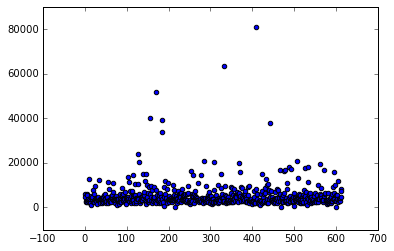

In [347]:
plot.scatter(train.index,train.ApplicantIncome)


In [348]:
train.loc[train.ApplicantIncome>60000,'ApplicantIncome']=train.ApplicantIncome.mean()

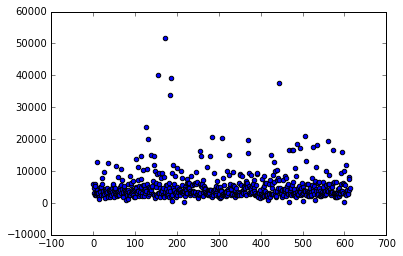

In [349]:
plot.scatter(train.index,train.ApplicantIncome)


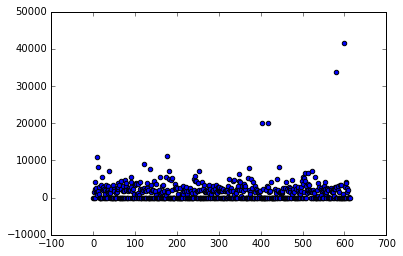

In [350]:
plot.scatter(train.index,train.CoapplicantIncome)


In [351]:
train.loc[train.CoapplicantIncome>30000,'CoapplicantIncome']=train.CoapplicantIncome.mean()

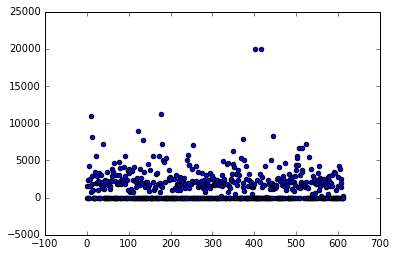

In [352]:
plot.scatter(train.index,train.CoapplicantIncome)


In [353]:
cat_col_test=test.columns[test.dtypes=='object']
cat_col_train=train.columns[train.dtypes=='object']

In [354]:
train.Loan_Status.value_counts()/train.shape[0]

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [355]:
from sklearn.preprocessing import LabelEncoder

In [356]:
train_bak=train

In [357]:
li=LabelEncoder()

In [358]:
cat_col_train=cat_col_train[1:]
cat_col_train=cat_col_train[1:]

In [359]:
cat_col_train

Index(['Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [360]:
li_test_ge=LabelEncoder()
test['Gender']=li_test_ge.fit_transform(test['Gender'])

li_train_ge=LabelEncoder()
train['Gender']=li_train_ge.fit_transform(train['Gender'])

In [361]:
li_test_me=LabelEncoder()
test['Married']=li_test_me.fit_transform(test['Married'])

li_train_me=LabelEncoder()
train['Married']=li_train_me.fit_transform(train['Married'])

In [362]:
li_test_de=LabelEncoder()
test['Dependents']=li_test_de.fit_transform(test['Dependents'])

li_train_de=LabelEncoder()
train['Dependents']=li_train_de.fit_transform(train['Dependents'])

In [363]:
li_test_ed=LabelEncoder()
test['Education']=li_test_ed.fit_transform(test['Education'])

li_train_ed=LabelEncoder()
train['Education']=li_train_ed.fit_transform(train['Education'])

In [364]:
li_test_se=LabelEncoder()
test['Self_Employed']=li_test_se.fit_transform(test['Self_Employed'])

li_train_se=LabelEncoder()
train['Self_Employed']=li_train_se.fit_transform(train['Self_Employed'])

In [365]:
li_test_pa=LabelEncoder()
test['Property_Area']=li_test_pa.fit_transform(test['Property_Area'])

li_train_ps=LabelEncoder()
train['Property_Area']=li_train_ps.fit_transform(train['Property_Area'])

In [282]:
li_train_ls=LabelEncoder()
train['Loan_Status']=li_train_ls.fit_transform(train['Loan_Status'])

In [403]:
train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status           object
dtype: object

In [404]:
ind_var=[x for x in train.columns if x not in ['Loan_ID','Loan_Status','ApplicantIncome','CoapplicantIncome','LoanAmount'
                                               ,'Loan_Amount_Term','Credit_History','Property_Area']]

In [435]:
ind_var=[x for x in train.columns if x not in ['Loan_ID','Loan_Status']]

In [368]:
dep_var='Loan_Status'

In [369]:
from sklearn.tree import DecisionTreeClassifier

In [405]:
model=DecisionTreeClassifier(max_depth=100,min_samples_leaf=100, max_features='sqrt')
model.fit(train[ind_var], train[dep_var])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
            max_features='sqrt', max_leaf_nodes=None, min_samples_leaf=100,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [406]:
pred_train=model.predict(train[ind_var])

In [407]:
pred_test=model.predict(test[ind_var])

In [408]:
test[dep_var]=pred_test

In [409]:
test[test.Loan_Status=='N']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [381]:
test.Loan_Status.value_counts()

Y    367
Name: Loan_Status, dtype: int64

In [382]:
from sklearn.metrics import accuracy_score

In [391]:
train_accuracy=accuracy_score(train[dep_var],pred_train)

In [392]:
train_accuracy

0.68729641693811072

In [412]:
pred_train[pred_train=='N']

array([], dtype=object)

In [413]:
# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [436]:
model = RandomForestClassifier(n_estimators=100)
#model = SVC()
#model = GradientBoostingClassifier()
model.fit(train[ind_var], train[dep_var])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [437]:
pred_train=model.predict(train[ind_var])

In [438]:
pred_test=model.predict(test[ind_var])

In [439]:
test[dep_var]=pred_test

In [442]:
test[test.Loan_Status=='N']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,LP001056,1,1,2,1,0,3881,0,147.000000,360.0,0.0,0,N
13,LP001094,1,1,2,0,0,12173,0,166.000000,360.0,0.0,1,N
25,LP001153,1,0,0,0,0,0,24000,148.000000,360.0,0.0,0,N
35,LP001203,1,0,0,0,0,3150,0,176.000000,360.0,0.0,1,N
55,LP001313,1,0,0,0,0,2750,0,130.000000,360.0,0.0,2,N
58,LP001323,0,1,2,0,0,2779,3664,176.000000,360.0,0.0,1,N
63,LP001347,0,0,0,0,0,2101,1500,108.000000,360.0,0.0,0,N
66,LP001352,1,1,0,1,0,4700,0,135.000000,360.0,0.0,1,N
67,LP001358,1,1,0,0,0,3445,0,130.000000,360.0,0.0,1,N
69,LP001361,1,1,0,0,0,2458,5105,188.000000,360.0,0.0,0,N


In [440]:
train_accuracy=accuracy_score(train[dep_var],pred_train)

In [441]:
train_accuracy

1.0

In [443]:
test[['Loan_ID','Loan_Status']].to_csv('F:\Data_Science\Analytic_Vidya\Loan_solution.csv',index=0)